In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/1. Compartment Analysis/1.4. Clustering Analyses/1.4.1. Kmeans Clustering/1.4.1.6. Eigencytokine Visualization/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/1. Compartment Analysis/1.4. Clustering Analyses/1.4.1. Kmeans Clustering/1.4.1.6. Eigencytokine Visualization/Output')
cur_date = "121321"

library(readxl)
library(dplyr)
library(tidyverse)
require(reshape2)
library(patchwork)

#reading in files
eigencytokines_NLF = read_csv("110921_NLF_eigencytokines.csv") %>%
    rename(SubjectID = X1)
NLF_clus <- data.frame(read_excel("011921NLF_cluster_assignments.xlsx")) %>%
    rename(Protein = Cytokine)
cytokines <- data.frame(read_excel("CytokineData_102920.xlsx", sheet = 2))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  ClusterA = col_double(),
  ClusterB = col_double(),
  ClusterC = col_double()
)




Heat map visualization of eigencytokines from NLF across all smoking groups to see visual differences between them.

In [2]:
#for the eigencytokines renaming the value to Conc_pslog2 is a bit misleading, but I did it to allow the full join 
#to work
#renaming cluster to name to make the final df
# eigencytokines df and splitting by cluster
eigencytokines_NLF = reshape2::melt(eigencytokines_NLF, variable = "Cluster", value.name = "Eigen_Value")
head(eigencytokines_NLF)

Using SubjectID as id variables



,SubjectID,Cluster,Eigen_Value
,<chr>,<fct>,<dbl>
1,NS_1,ClusterA,-0.3272376
2,NS_10,ClusterA,-0.3419100
3,NS_11,ClusterA,-0.1265206
4,NS_12,ClusterA,-0.1267970
5,NS_13,ClusterA,-0.3183685
6,NS_14,ClusterA,-0.3213186


In [3]:
#eigencytokines df that specifies the cluster they correspond to and splitting by those clusters
eigencytokines_df = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), eigencytokines_NLF)  %>%
    select(SubjectID, Cluster, Group, Eigen_Value) %>%
    # removes duplicate rows
    unique() %>%
    group_by(Group, Cluster) %>%
    group_split

eigencytokines_ClusterA_NS = eigencytokines_df[[7]] %>% 
    select(-Cluster)
eigencytokines_ClusterB_NS = eigencytokines_df[[8]] %>% 
    select(-Cluster)
eigencytokines_ClusterC_NS = eigencytokines_df[[9]] %>% 
    select(-Cluster)
eigencytokines_ClusterA_CS = eigencytokines_df[[1]] %>% 
    select(-Cluster)
eigencytokines_ClusterB_CS = eigencytokines_df[[2]] %>% 
    select(-Cluster)
eigencytokines_ClusterC_CS = eigencytokines_df[[3]] %>% 
    select(-Cluster)
eigencytokines_ClusterA_Ecig = eigencytokines_df[[4]] %>% 
    select(-Cluster)
eigencytokines_ClusterB_Ecig = eigencytokines_df[[5]] %>% 
    select(-Cluster)
eigencytokines_ClusterC_Ecig = eigencytokines_df[[6]] %>% 
    select(-Cluster)
head(eigencytokines_ClusterC_NS)

Joining, by = "SubjectID"



SubjectID,Group,Eigen_Value
<chr>,<chr>,<dbl>
NS_1,NS,0.2175413
NS_2,NS,0.2634276
NS_3,NS,-0.2923103
NS_4,NS,0.1872188
NS_5,NS,0.1348291
NS_6,NS,-0.1806104


In [5]:
#getting subject id's ordered by avg concentrations grouped within smoking groups
ordered_df = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), eigencytokines_NLF) %>%
    select(SubjectID, Group, Cluster, Eigen_Value) %>%
    group_by(Group, SubjectID) %>%
    summarize(Avg_Conc = mean(Eigen_Value)) %>%
    arrange(Group, Avg_Conc)

ordered_df$Group = factor(ordered_df$Group, levels = c("NS", "CS", "Ecig"))
#factor didn't work so doing it manually
ordered_avg_subject_ids = c(ordered_df$SubjectID[31:44], ordered_df$SubjectID[1:13], ordered_df$SubjectID[14:30])

Joining, by = "SubjectID"

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.



Group,SubjectID,Avg_Conc
<fct>,<chr>,<dbl>
CS,CS_21,-0.378318559
CS,CS_17,-0.361233587
CS,CS_27,-0.323015514
CS,CS_24,-0.312454787
CS,CS_20,-0.308891291
CS,CS_26,-0.285876407
CS,CS_16,-0.257855261
CS,CS_22,-0.236593594
CS,CS_25,-0.161957773


In [16]:
final_df = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), eigencytokines_NLF)  %>%
    select(SubjectID, Cluster, Group, Eigen_Value) %>%
    # removes duplicate rows
    unique() %>%
    #creating a space within the cluster Clusters
    mutate(Cluster = ifelse(Cluster == "ClusterA", "Cluster A", 
           ifelse(Cluster == "ClusterB", "Cluster B",
           ifelse(Cluster == "ClusterC", "Cluster C", Cluster))))

head(final_df)

Joining, by = "SubjectID"



,SubjectID,Cluster,Group,Eigen_Value
,<chr>,<chr>,<chr>,<dbl>
1,NS_1,Cluster A,NS,-0.3272376
2,NS_1,Cluster B,NS,0.2721166
3,NS_1,Cluster C,NS,0.2175413
67,NS_2,Cluster A,NS,-0.3009171
68,NS_2,Cluster B,NS,0.0916713
69,NS_2,Cluster C,NS,0.2634276


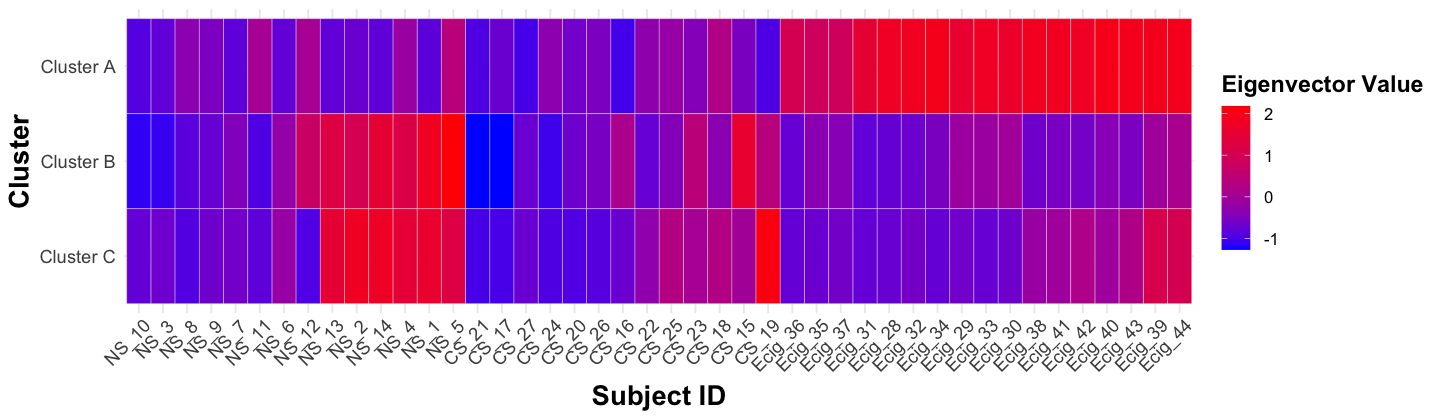

In [22]:
options(repr.plot.width=12, repr.plot.height=3.5) #changing size

#subject ids ordered by avg cytokine conc
subject_ids = factor(final_df$SubjectID, levels = ordered_avg_subject_ids)

#reversing clusters for heat map
rev_clusters = factor(final_df$Cluster, levels = c("Cluster C", "Cluster B", "Cluster A"))

#lastly scaling each cytokine to creating a larger visual difference between the smoking groups
Figure5 = ggplot(data = final_df, aes(x = subject_ids, y = rev_clusters, fill = scale(Eigen_Value))) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Subject ID", y = "Cluster", fill = "Eigenvector Value")

Figure5